## Mini Project III

### Do they have credit account? How much do they live in debt?

In [1]:
import pandas as pd
import numpy as np
# import visualize
import matplotlib.pyplot as plt
import seaborn as sns
# import Kmeans from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
# import DBSCAN
from sklearn.cluster import DBSCAN
# Aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
# Cluster hierarchy
import scipy.cluster.hierarchy as sch
from scipy import stats

In [2]:
customer = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\customer.csv")

In [3]:
customer_age = customer[['cust_id','age']]

In [4]:
customer_age['age_bin'] = pd.cut(x = customer_age['age'], bins = [13, 20, 40, 60, 90])

C:\Users\quang\AppData\Local\Temp\ipykernel_8756\1278101733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_age['age_bin'] = pd.cut(x = customer_age['age'], bins = [13, 20, 40, 60, 90])


In [5]:
# get age_bin dummy
age_data = pd.get_dummies(customer_age, columns = ['age_bin']).drop(columns = ['cust_id'])
# concatenate with the previous dataframe
customer_age_data = pd.concat([customer_age,age_data], ignore_index=False, axis = 1).drop(columns = ['age'])

In [6]:
customer_age_data

,cust_id,age_bin,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,1362691,"(40, 60]",0,0,1,0
1,1362487,"(60, 90]",0,0,0,1
2,1363160,"(20, 40]",0,1,0,0
3,1362752,"(40, 60]",0,0,1,0
4,1362548,"(40, 60]",0,0,1,0
...,...,...,...,...,...,...
742,1363324,"(20, 40]",0,1,0,0
743,1362895,"(40, 60]",0,0,1,0
744,1362569,"(40, 60]",0,0,1,0
745,1363364,"(20, 40]",0,1,0,0


In [7]:
credit_account = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\credit_account.csv")
credit_customer = pd.merge(credit_account, customer_age_data, how = "inner")

In [8]:
credit_customer['account_active'] = credit_customer['account_active'].replace({'Y':1, 'N':0})

In [26]:
credit_transaction = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\credit_transactions.csv")

In [30]:
transaction_customer = pd.merge(credit_customer, credit_transaction, how = 'inner')
transaction_customer.dropna(inplace = True)
transaction_customer

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,age_bin,...,"age_bin_(60, 90]",tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
122,1362752,4561143213627520,2400,0,0,9.10.1994,2.4.1995,2302.14,0.00,"(40, 60]",...,0,9,-229.50,-229.50,0.0,-2206.34,10.2.1995,185551.0,E,CG
123,1362752,4561143213627520,2400,0,0,9.10.1994,2.4.1995,2302.14,0.00,"(40, 60]",...,0,8,-44.59,-44.59,0.0,-1976.84,8.2.1995,123753.0,E,CG
124,1362752,4561143213627520,2400,0,0,9.10.1994,2.4.1995,2302.14,0.00,"(40, 60]",...,0,7,0.00,0.00,0.0,-1932.25,8.2.1995,3725.0,A,IQ
127,1362752,4561143213627520,2400,0,0,9.10.1994,2.4.1995,2302.14,0.00,"(40, 60]",...,0,5,-80.73,-80.73,0.0,-2400.00,27.1.1995,152553.0,E,CG
128,1362752,4561143213627520,2400,0,0,9.10.1994,2.4.1995,2302.14,0.00,"(40, 60]",...,0,14,-73.13,-73.13,0.0,-2400.00,23.3.1995,110100.0,E,CG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,1363364,4561143213633640,3000,0,0,23.11.1989,23.7.1995,1783.86,1785.97,"(20, 40]",...,0,21,-81.08,-81.08,0.0,-718.70,22.2.1995,190955.0,E,CG
19924,1363364,4561143213633640,3000,0,0,23.11.1989,23.7.1995,1783.86,1785.97,"(20, 40]",...,0,26,-64.09,-64.09,0.0,-64.09,3.3.1995,101900.0,E,CG
19925,1363364,4561143213633640,3000,0,0,23.11.1989,23.7.1995,1783.86,1785.97,"(20, 40]",...,0,31,-133.19,-133.19,0.0,-822.52,17.3.1995,200929.0,E,CG
19926,1363364,4561143213633640,3000,0,0,23.11.1989,23.7.1995,1783.86,1785.97,"(20, 40]",...,0,57,-60.00,-60.00,0.0,-261.12,13.6.1995,111236.0,A,CA


In [31]:
credit_data = transaction_customer[['age_bin','credit_limit', 'credit_rating' , 'starting_balance', 'ending_balance','tran_amt','account_active', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']]
credit_data

,age_bin,credit_limit,credit_rating,starting_balance,ending_balance,tran_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
122,"(40, 60]",2400,0,2302.14,0.00,-229.50,0,0,0,1,0
123,"(40, 60]",2400,0,2302.14,0.00,-44.59,0,0,0,1,0
124,"(40, 60]",2400,0,2302.14,0.00,0.00,0,0,0,1,0
127,"(40, 60]",2400,0,2302.14,0.00,-80.73,0,0,0,1,0
128,"(40, 60]",2400,0,2302.14,0.00,-73.13,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19923,"(20, 40]",3000,0,1783.86,1785.97,-81.08,0,0,1,0,0
19924,"(20, 40]",3000,0,1783.86,1785.97,-64.09,0,0,1,0,0
19925,"(20, 40]",3000,0,1783.86,1785.97,-133.19,0,0,1,0,0
19926,"(20, 40]",3000,0,1783.86,1785.97,-60.00,0,0,1,0,0


In [32]:
# scale data
credit_data.dropna(inplace = True)
credit_col = ['credit_limit', 'credit_rating', 'starting_balance', 'ending_balance','tran_amt','account_active', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']
credit_scaled = ['credit_limit_scaled', 'credit_rating_scaled', 'starting_balance_scaled', 'ending_balance_scaled','tran_amt_scaled','account_active_scaled', 'age_bin_(13, 20]_scaled', 'age_bin_(20, 40]_scaled', 'age_bin_(40, 60]_scaled', 'age_bin_(60, 90]_scaled']
scaler = StandardScaler()
credit_data[credit_scaled] = scaler.fit_transform(credit_data[credit_col])
credit_data.head()

C:\Users\quang\AppData\Local\Temp\ipykernel_8756\3291445477.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\quang\AppData\Local\Temp\ipykernel_8756\3291445477.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\quang\AppData\Local\Temp\ipykernel_8756\3291445477.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,age_bin,credit_limit,credit_rating,starting_balance,ending_balance,tran_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]",...,credit_limit_scaled,credit_rating_scaled,starting_balance_scaled,ending_balance_scaled,tran_amt_scaled,account_active_scaled,"age_bin_(13, 20]_scaled","age_bin_(20, 40]_scaled","age_bin_(40, 60]_scaled","age_bin_(60, 90]_scaled"
122,"(40, 60]",2400,0,2302.14,0.0,-229.50,0,0,0,1,...,-0.491714,-0.420774,-0.171444,-0.665385,-0.261071,0.0,-0.296404,-0.531257,0.991328,-0.491821
123,"(40, 60]",2400,0,2302.14,0.0,-44.59,0,0,0,1,...,-0.491714,-0.420774,-0.171444,-0.665385,0.170835,0.0,-0.296404,-0.531257,0.991328,-0.491821
124,"(40, 60]",2400,0,2302.14,0.0,0.00,0,0,0,1,...,-0.491714,-0.420774,-0.171444,-0.665385,0.274987,0.0,-0.296404,-0.531257,0.991328,-0.491821
127,"(40, 60]",2400,0,2302.14,0.0,-80.73,0,0,0,1,...,-0.491714,-0.420774,-0.171444,-0.665385,0.086421,0.0,-0.296404,-0.531257,0.991328,-0.491821
128,"(40, 60]",2400,0,2302.14,0.0,-73.13,0,0,0,1,...,-0.491714,-0.420774,-0.171444,-0.665385,0.104173,0.0,-0.296404,-0.531257,0.991328,-0.491821


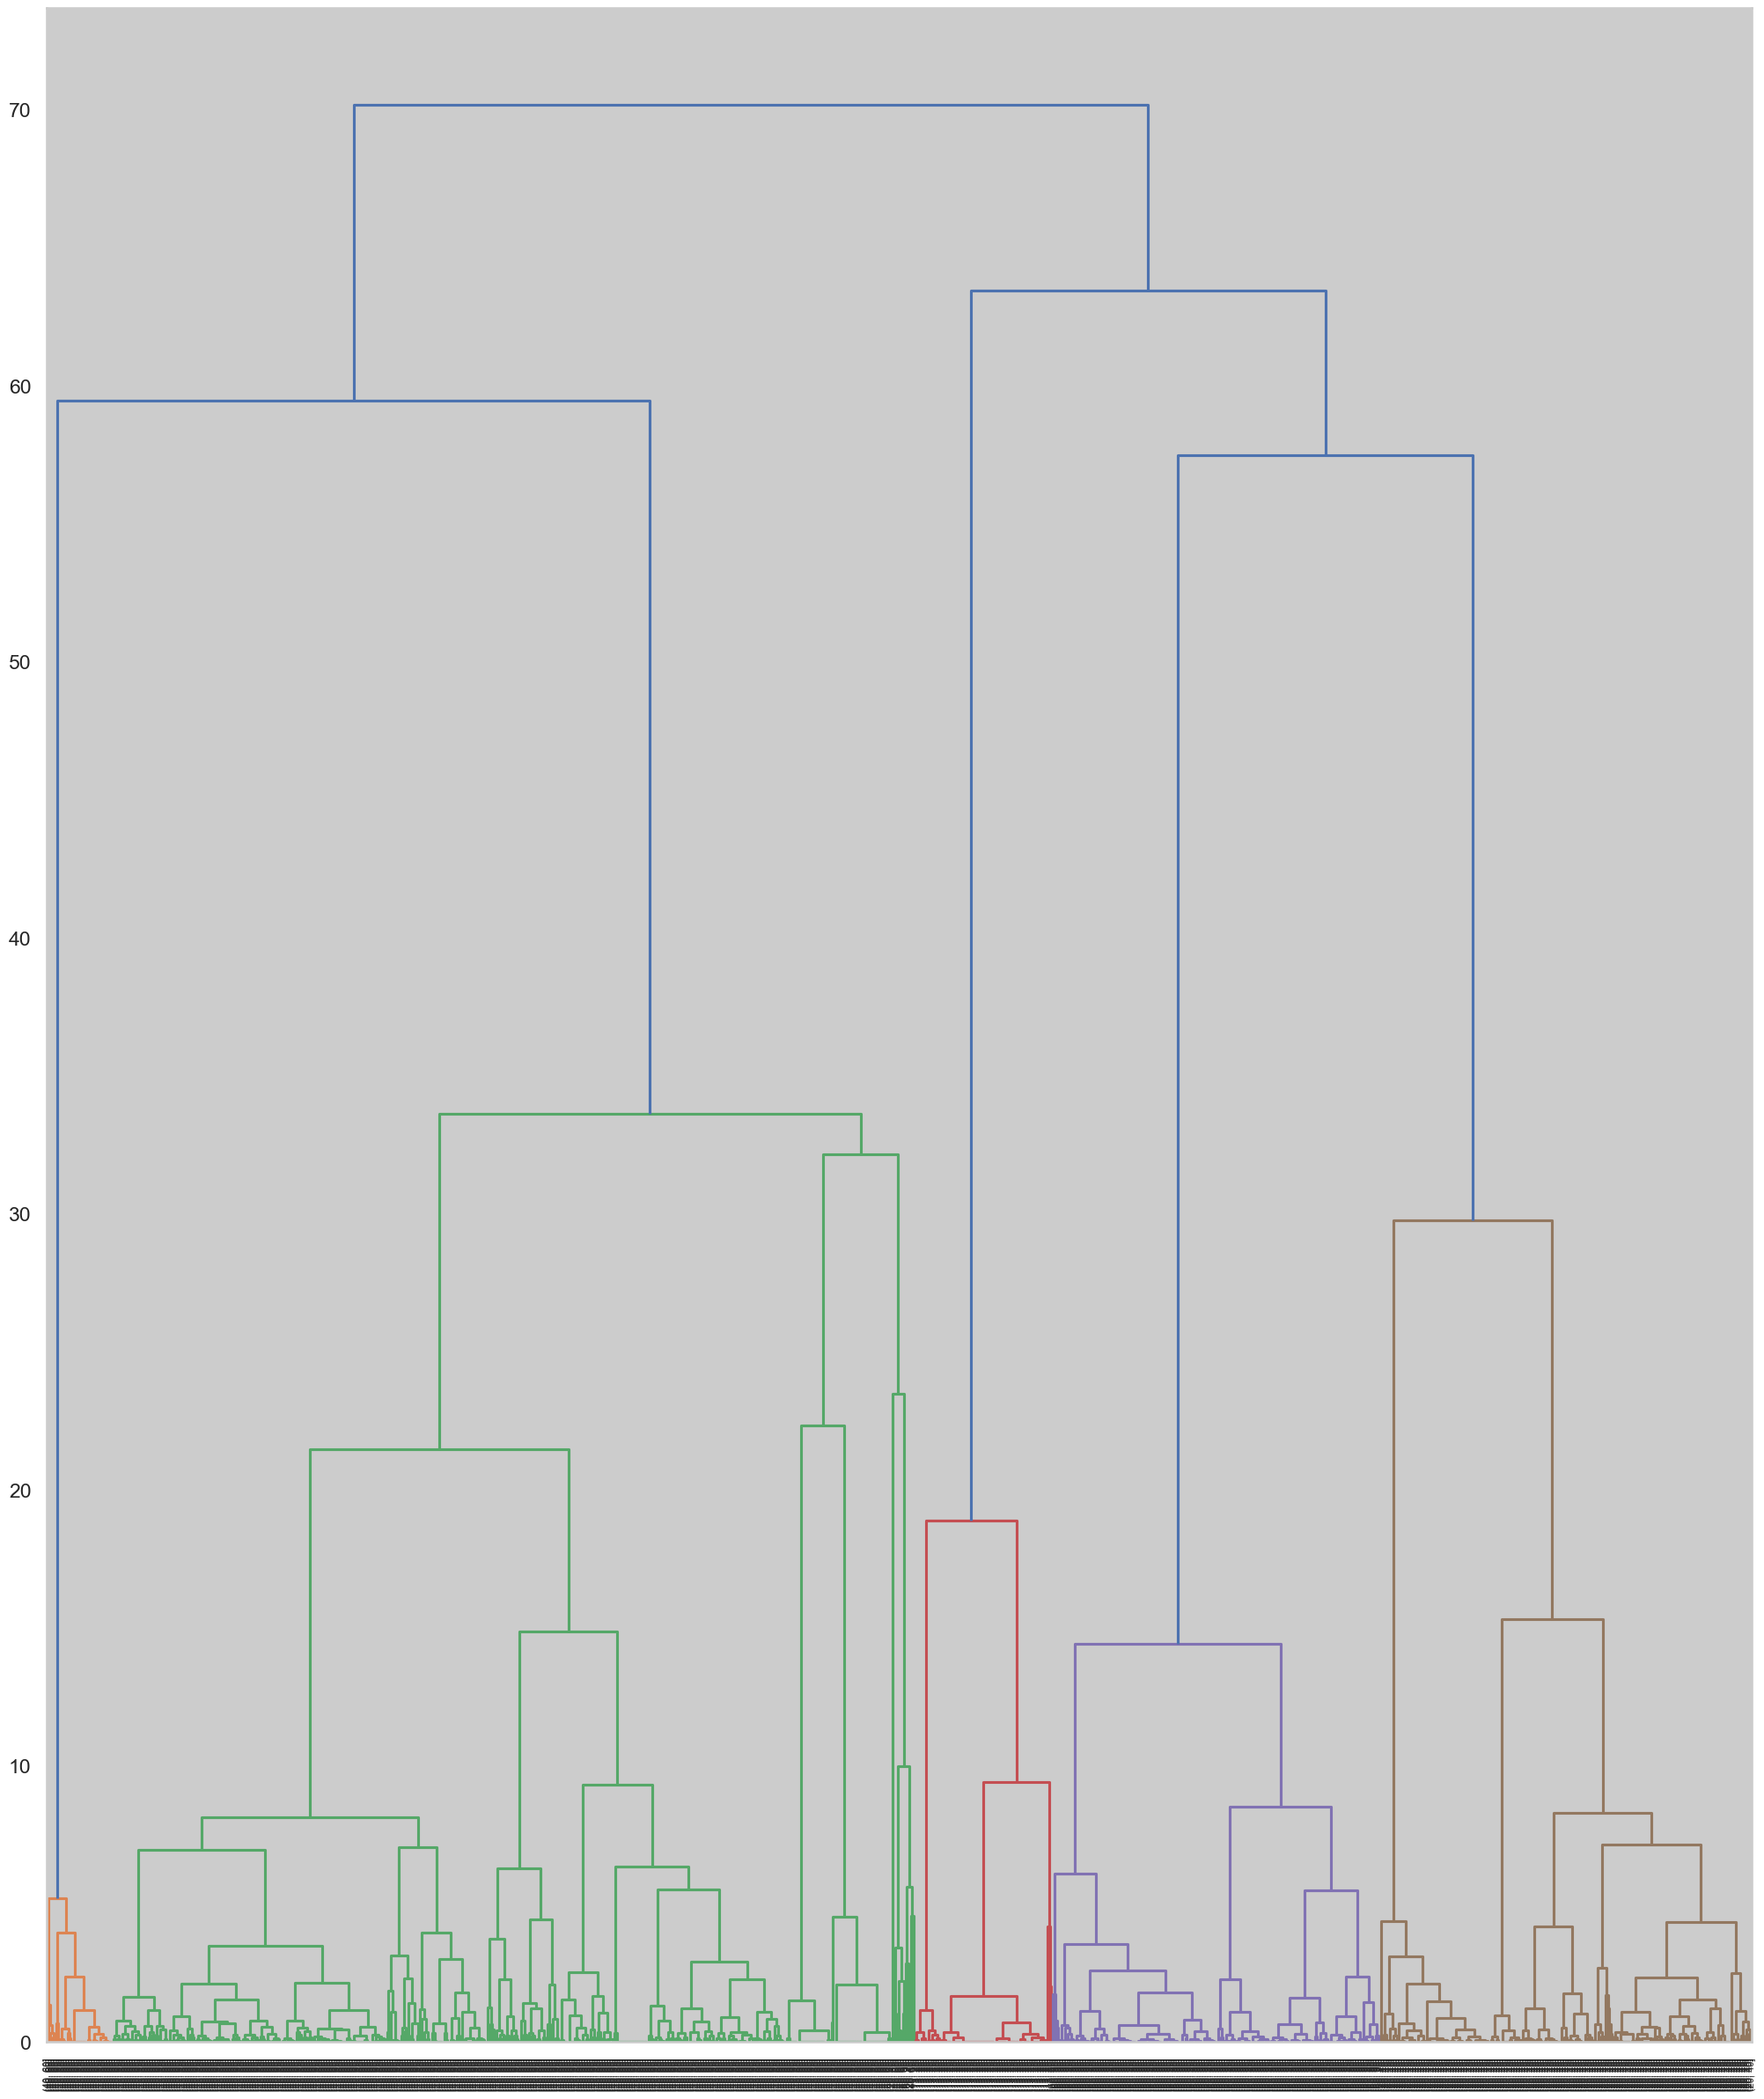

In [33]:
linkage_type = 'ward'
cluster_credit = credit_data.iloc[:, 11:]
linkage_matrix = linkage(cluster_credit, linkage_type)

plt.figure(figsize=(25,30))
labels = list(credit_data['age_bin'])

# plot using 'dendrogram()'
dendrogram(linkage_matrix, labels=labels,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.)

plt.show()

In [34]:
#Run Clustering
model = AgglomerativeClustering(n_clusters = 3)
model.fit(cluster_credit)

AgglomerativeClustering(n_clusters=3)

In [36]:
#Adding cluster column from output of model
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
cluster_credit = credit_data.iloc[:, 11:]

clustering_model.fit(cluster_credit)
label = clustering_model.labels_
print(label)

credit_data['cluster'] = label
credit_data.dropna(inplace = True)
credit_data.head()

[0 0 0 ... 1 1 1]


C:\Users\quang\AppData\Local\Temp\ipykernel_8756\1501166054.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\quang\AppData\Local\Temp\ipykernel_8756\1501166054.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age_bin,credit_limit,credit_rating,starting_balance,ending_balance,tran_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]",...,credit_rating_scaled,starting_balance_scaled,ending_balance_scaled,tran_amt_scaled,account_active_scaled,"age_bin_(13, 20]_scaled","age_bin_(20, 40]_scaled","age_bin_(40, 60]_scaled","age_bin_(60, 90]_scaled",cluster
122,"(40, 60]",2400,0,2302.14,0.0,-229.50,0,0,0,1,...,-0.420774,-0.171444,-0.665385,-0.261071,0.0,-0.296404,-0.531257,0.991328,-0.491821,0
123,"(40, 60]",2400,0,2302.14,0.0,-44.59,0,0,0,1,...,-0.420774,-0.171444,-0.665385,0.170835,0.0,-0.296404,-0.531257,0.991328,-0.491821,0
124,"(40, 60]",2400,0,2302.14,0.0,0.00,0,0,0,1,...,-0.420774,-0.171444,-0.665385,0.274987,0.0,-0.296404,-0.531257,0.991328,-0.491821,0
127,"(40, 60]",2400,0,2302.14,0.0,-80.73,0,0,0,1,...,-0.420774,-0.171444,-0.665385,0.086421,0.0,-0.296404,-0.531257,0.991328,-0.491821,0
128,"(40, 60]",2400,0,2302.14,0.0,-73.13,0,0,0,1,...,-0.420774,-0.171444,-0.665385,0.104173,0.0,-0.296404,-0.531257,0.991328,-0.491821,0


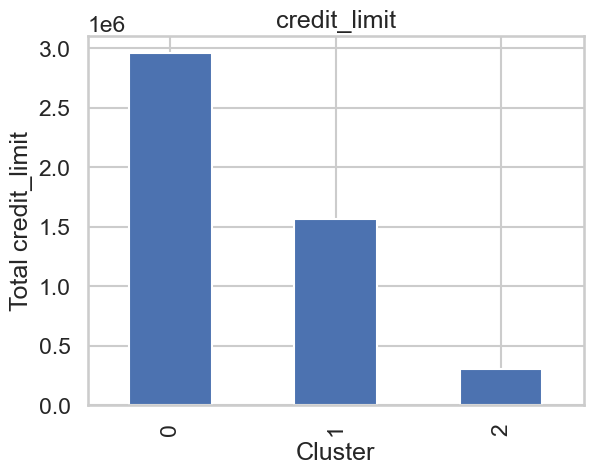

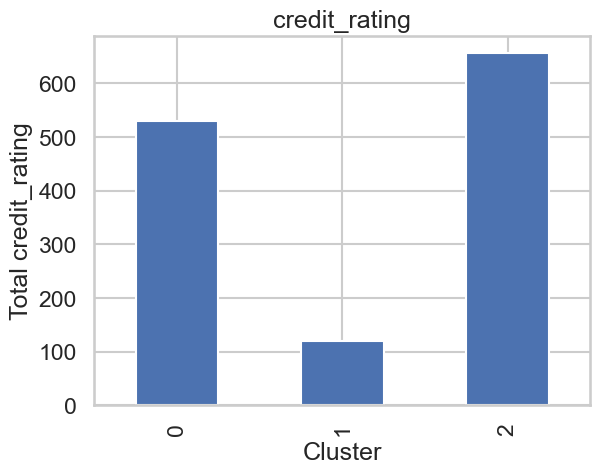

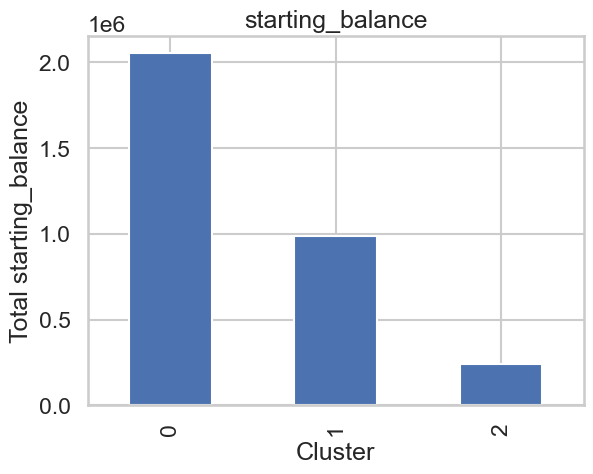

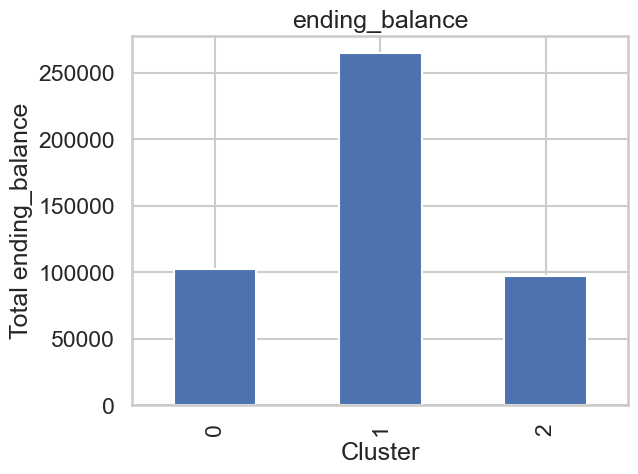

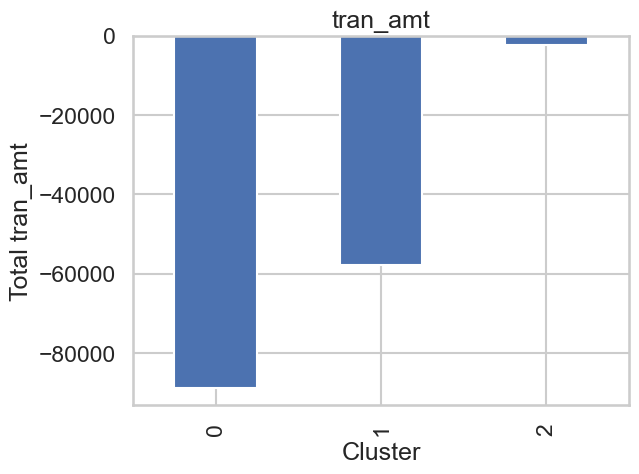

In [38]:
# Visualize the results by total
features = list(credit_data.columns)[1:6]
for x in features:
  plt.figure()
  credit_data.groupby(["cluster"])[x].sum().plot(kind="bar", ylabel='Total ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

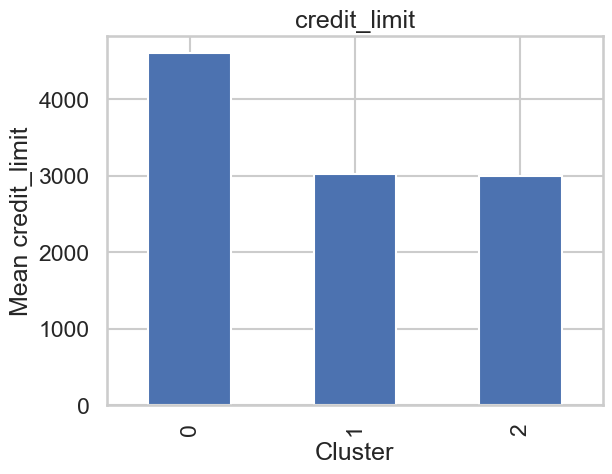

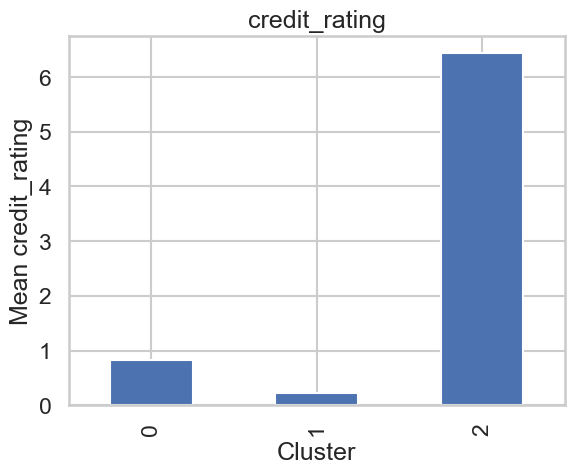

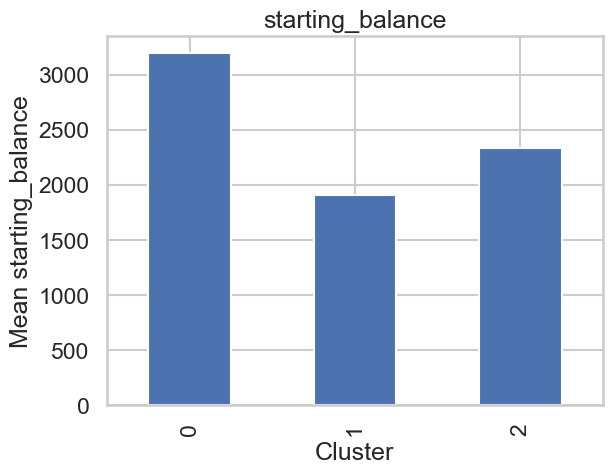

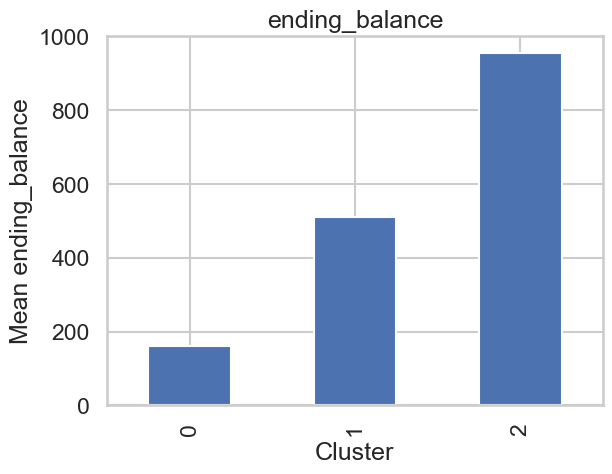

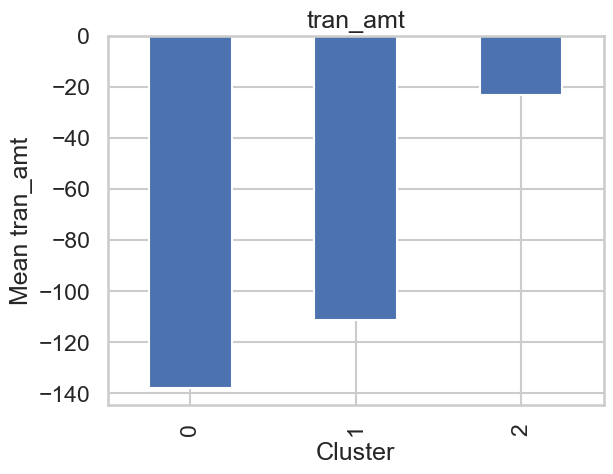

In [39]:
# Visualize the results by mean
features = list(credit_data.columns)[1:6]
for x in features:
  plt.figure()
  credit_data.groupby(["cluster"])[x].mean().plot(kind="bar", ylabel='Mean ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

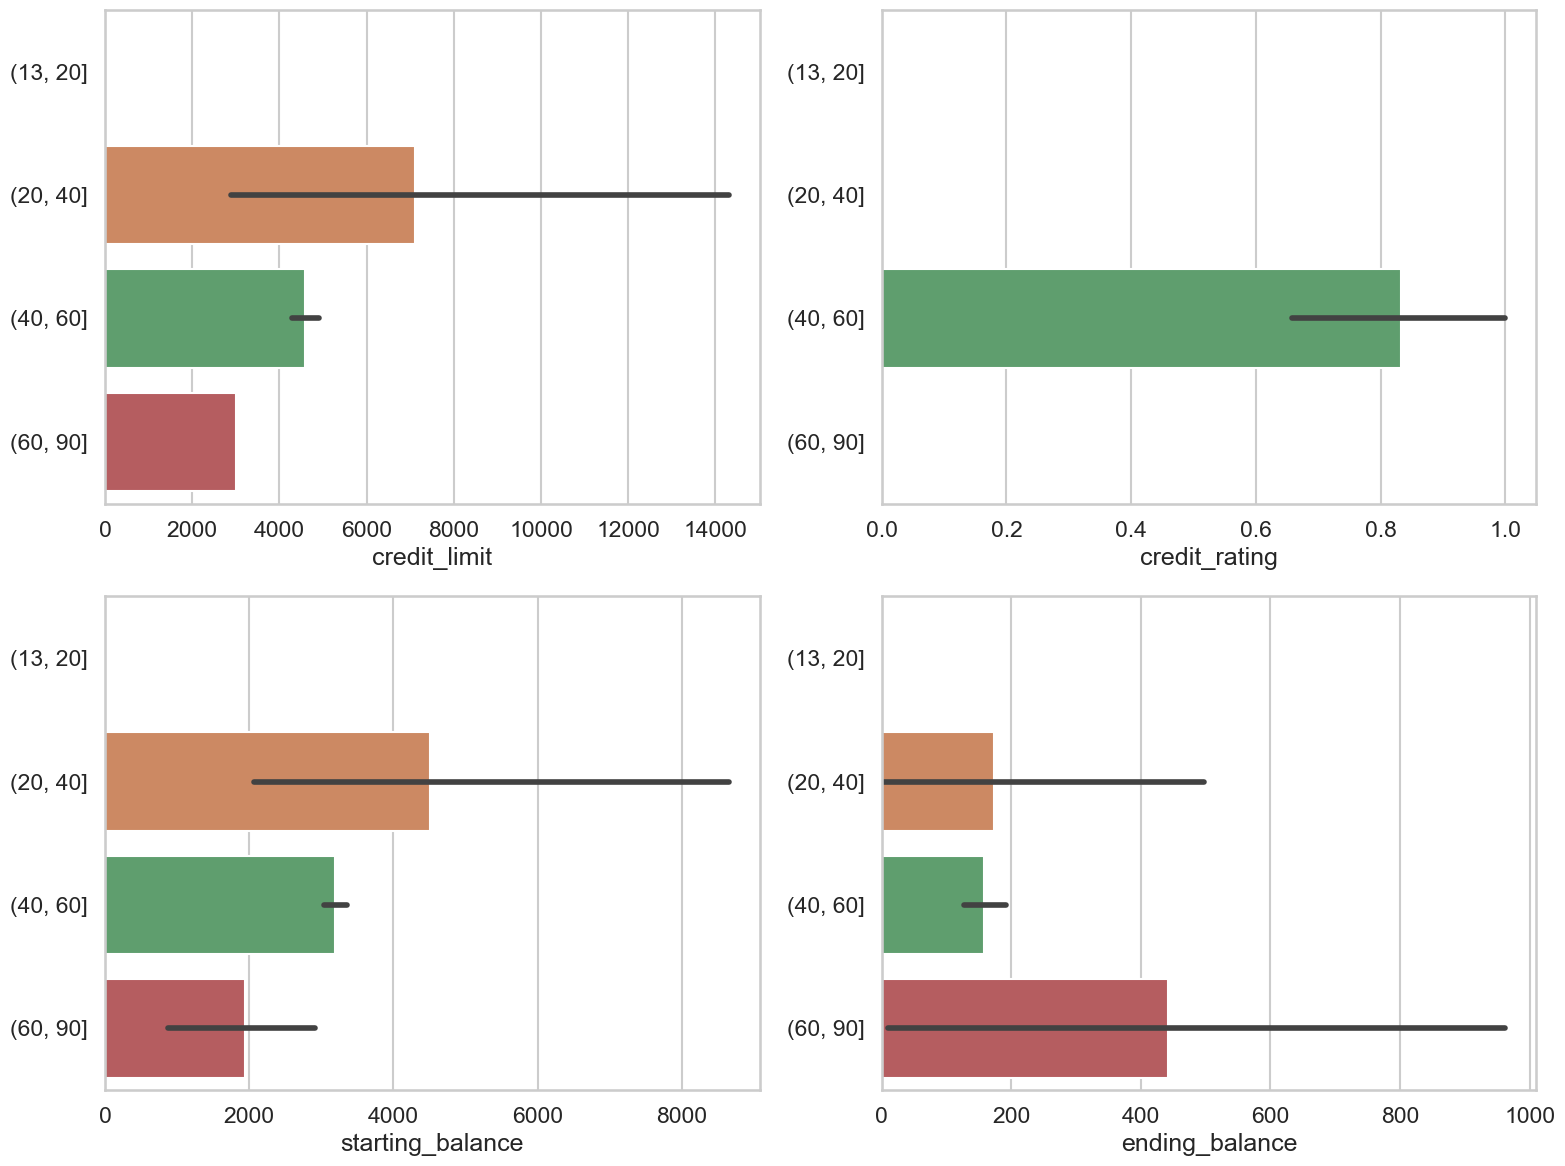

In [40]:
# Cluster 0
cluster0 = credit_data[credit_data['cluster'] == 0.0]
fig, axs = plt.subplots(2, 2 , figsize=(16, 12))
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster_1 = cluster0.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_1, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

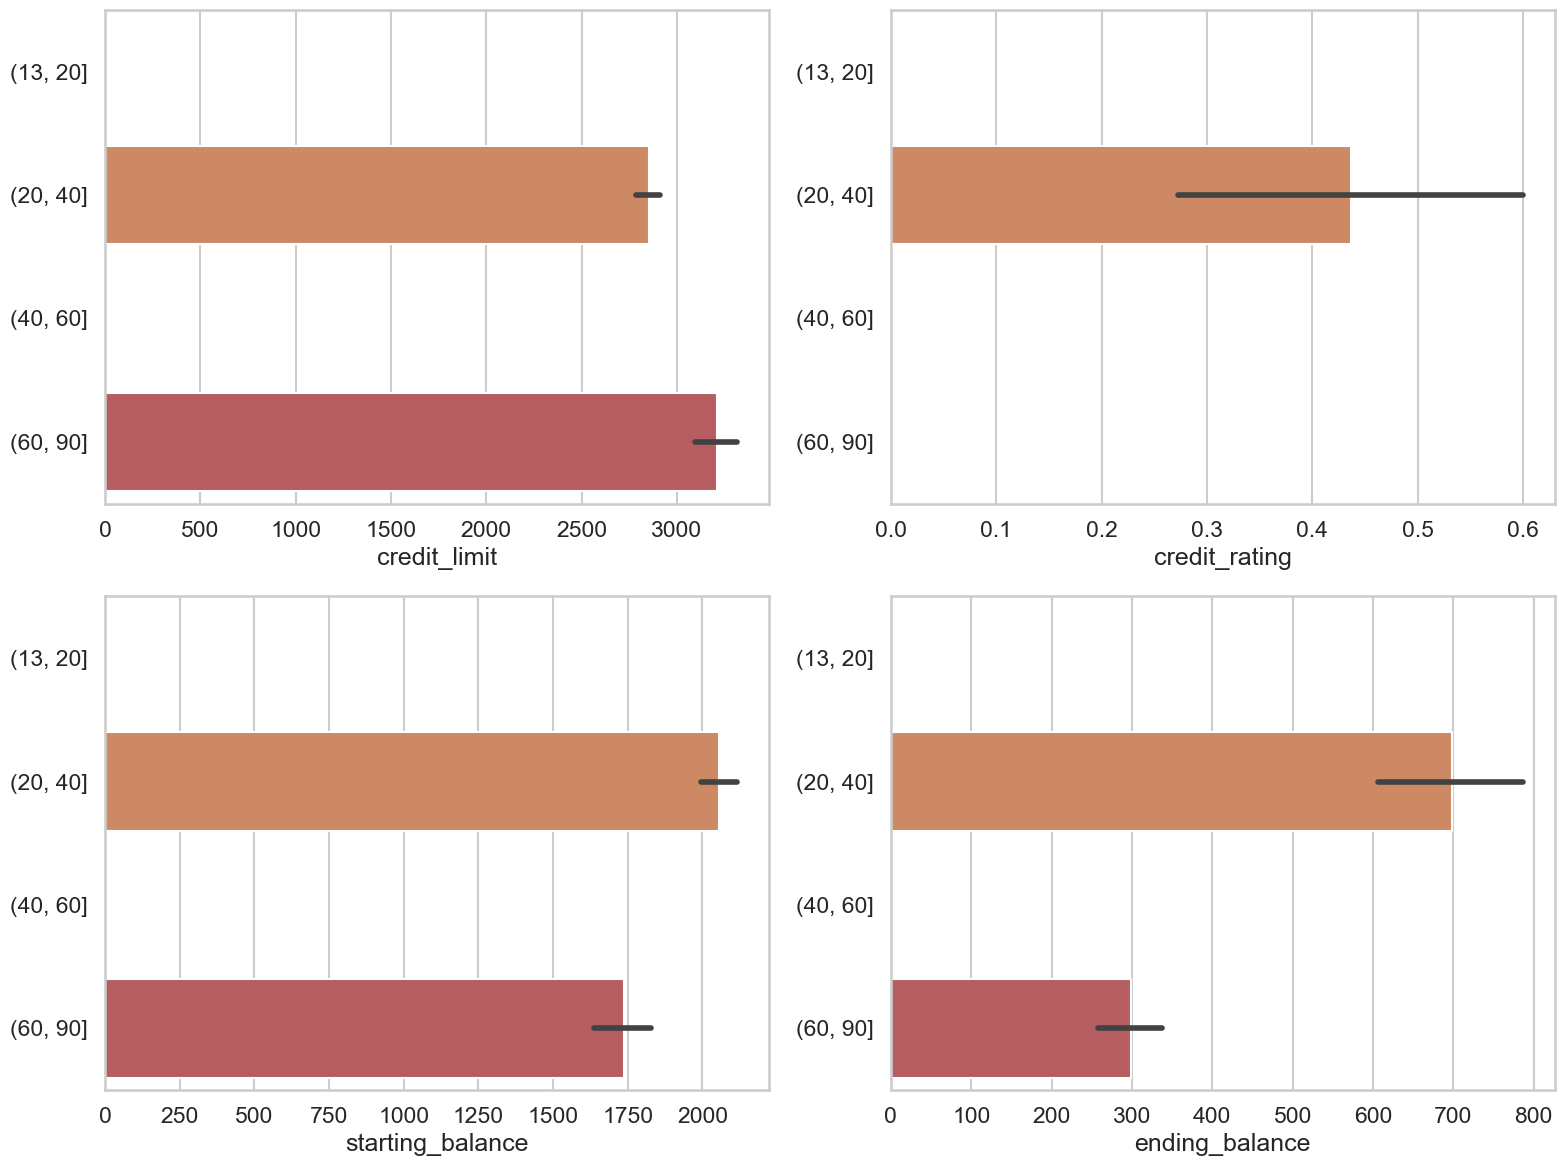

In [41]:
# Cluster 1
cluster1 = credit_data[credit_data['cluster'] == 1.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster_2 = cluster1.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_2, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

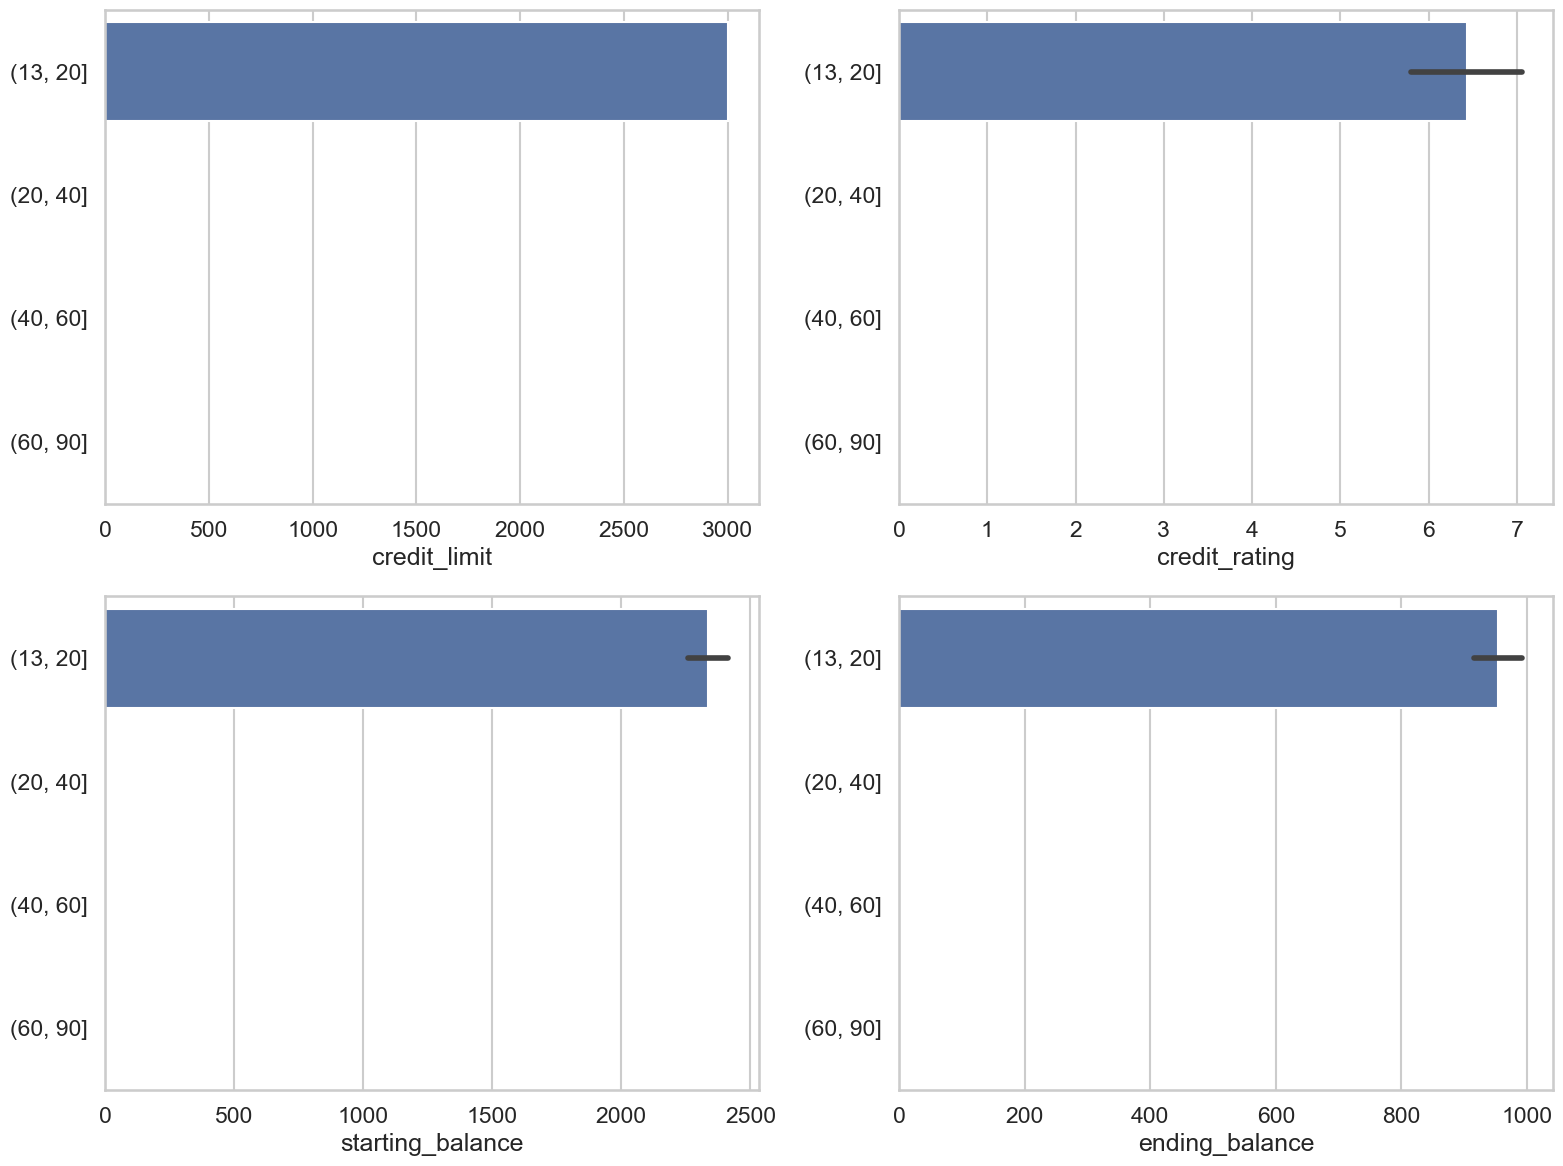

In [42]:
# Cluster 2
cluster2 = credit_data[credit_data['cluster'] == 2.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster_3 = cluster2.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_3, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

In [43]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()

In [44]:
credit_data

,age_bin,credit_limit,credit_rating,starting_balance,ending_balance,tran_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]",...,credit_rating_scaled,starting_balance_scaled,ending_balance_scaled,tran_amt_scaled,account_active_scaled,"age_bin_(13, 20]_scaled","age_bin_(20, 40]_scaled","age_bin_(40, 60]_scaled","age_bin_(60, 90]_scaled",cluster
122,"(40, 60]",2400,0,2302.14,0.00,-229.50,0,0,0,1,...,-0.420774,-0.171444,-0.665385,-0.261071,0.0,-0.296404,-0.531257,0.991328,-0.491821,0
123,"(40, 60]",2400,0,2302.14,0.00,-44.59,0,0,0,1,...,-0.420774,-0.171444,-0.665385,0.170835,0.0,-0.296404,-0.531257,0.991328,-0.491821,0
124,"(40, 60]",2400,0,2302.14,0.00,0.00,0,0,0,1,...,-0.420774,-0.171444,-0.665385,0.274987,0.0,-0.296404,-0.531257,0.991328,-0.491821,0
127,"(40, 60]",2400,0,2302.14,0.00,-80.73,0,0,0,1,...,-0.420774,-0.171444,-0.665385,0.086421,0.0,-0.296404,-0.531257,0.991328,-0.491821,0
128,"(40, 60]",2400,0,2302.14,0.00,-73.13,0,0,0,1,...,-0.420774,-0.171444,-0.665385,0.104173,0.0,-0.296404,-0.531257,0.991328,-0.491821,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,"(20, 40]",3000,0,1783.86,1785.97,-81.08,0,0,1,0,...,-0.420774,-0.474262,2.564575,0.085603,0.0,-0.296404,1.882330,-1.008748,-0.491821,1
19924,"(20, 40]",3000,0,1783.86,1785.97,-64.09,0,0,1,0,...,-0.420774,-0.474262,2.564575,0.125288,0.0,-0.296404,1.882330,-1.008748,-0.491821,1
19925,"(20, 40]",3000,0,1783.86,1785.97,-133.19,0,0,1,0,...,-0.420774,-0.474262,2.564575,-0.036113,0.0,-0.296404,1.882330,-1.008748,-0.491821,1
19926,"(20, 40]",3000,0,1783.86,1785.97,-60.00,0,0,1,0,...,-0.420774,-0.474262,2.564575,0.134841,0.0,-0.296404,1.882330,-1.008748,-0.491821,1


In [45]:
credit_radar = credit_data[['cluster','credit_limit', 'credit_rating', 'starting_balance', 'ending_balance','tran_amt', 'account_active', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']]

In [46]:
credit_col = ['credit_limit', 'credit_rating', 'starting_balance', 'ending_balance','tran_amt','account_active', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']
credit_radar[credit_col] = min_max_scale.fit_transform(credit_radar[credit_col])
credit_radar

C:\Users\quang\AppData\Local\Temp\ipykernel_8756\3368063164.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster,credit_limit,credit_rating,starting_balance,ending_balance,tran_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
122,0,0.019737,0.0,0.164139,0.000000,0.129701,0.0,0.0,0.0,1.0,0.0
123,0,0.019737,0.0,0.164139,0.000000,0.147652,0.0,0.0,0.0,1.0,0.0
124,0,0.019737,0.0,0.164139,0.000000,0.151981,0.0,0.0,0.0,1.0,0.0
127,0,0.019737,0.0,0.164139,0.000000,0.144143,0.0,0.0,0.0,1.0,0.0
128,0,0.019737,0.0,0.164139,0.000000,0.144881,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19923,1,0.059211,0.0,0.104426,0.970636,0.144109,0.0,0.0,1.0,0.0,0.0
19924,1,0.059211,0.0,0.104426,0.970636,0.145759,0.0,0.0,1.0,0.0,0.0
19925,1,0.059211,0.0,0.104426,0.970636,0.139051,0.0,0.0,1.0,0.0,0.0
19926,1,0.059211,0.0,0.104426,0.970636,0.146156,0.0,0.0,1.0,0.0,0.0


In [47]:
credit_radar = credit_radar.groupby(['cluster']).mean().reset_index()
credit_radar

,cluster,credit_limit,credit_rating,starting_balance,ending_balance,tran_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,0,0.164382,0.103033,0.266678,0.086791,0.138590,0.0,0.0,0.004666,0.990669,0.004666
1,1,0.060519,0.028958,0.118545,0.277723,0.141177,0.0,0.0,0.530888,0.000000,0.469112
2,2,0.059211,0.803922,0.167906,0.518390,0.149740,0.0,1.0,0.000000,0.000000,0.000000


In [48]:
import plotly.graph_objects as go
def plot_radar(data):
    fig = go.Figure()
    num_cluster = credit_radar['cluster'].max() + 1
    categories = list(credit_radar.columns)[1:11]
    
    for i in range(num_cluster):
        r = credit_radar.iloc[i,1:].values
        fig.add_trace(go.Scatterpolar(
            r = r,
            theta = categories,
            fill = 'toself',
            name = f'Cluster: {i}',
            opacity = 0.5
        ))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0,0.5])),showlegend=True)
    fig.show()

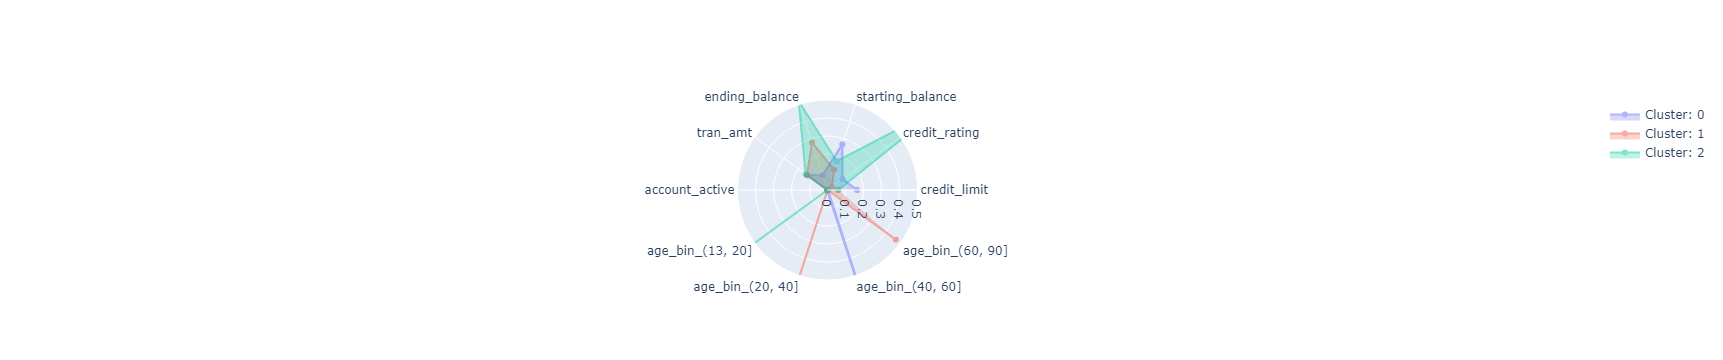

In [49]:
plot_radar(credit_data)